In [168]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import csv
import numpy as np
import os

In [169]:
def get_size(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    total = 0
    for row in csvreader:
        total = total +1
    file.close()
    return total
    
def get_header(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    header = next(csvreader)[0].split(";")
    return header

def get_row_normalized(file_name,row_name):
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    first_val = float(next(csvreader)[0].split(";")[idx])
    print('first_val: {}'.format(first_val))
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            x.append(i)
            y.append(first_val - float(itm))
    file.close()
    return np.array(x),np.array(y)

    
def plot_row(p, file_name,item,name = None):
    if not item in get_header(file_name):
        print("Error {} not found in {}".format(item,file_name))
        return p

    if item == 'Remaining_space':
        x,row_i = get_row_normalized(file_name,item)
    else:
        x,row_i = get_row(file_name,item)
    if name == None:
        name = os.path.basename(file_name)
    p.plot(x, row_i, label = name)
    return p

def plot_all(title,files,column,filter_files,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
    #         print(f)
            plot_row(ax,f,column,name=legend_map[f])


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()
    
def plot_all_multi(title,files,columns,filter_files,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
            for column in columns:
                plot_row(ax,f,column,name="{}_{}".format(legend_map[f],column))


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()

In [170]:
path_folder = "../../benchmarks/v3/"
os.listdir(path_folder)

['.DS_Store', 'mac_m1', 'macbook_old.zip', 'mac_m1.zip', 'mac_pro']

In [171]:
# # Rename files:

# all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']
# print(all_files)
# for f in all_files:
#     if 'mac_pro' in f:     
#         name = f.replace('/2022','/macpro_2022') 
#         os.rename(f,name) 
#     elif 'mac_m1' in f:
#         name = f.replace('/2022','/macM1max_2022')
#         os.rename(f,name)

In [172]:
incremental_files_time = []
incremental_files_size = []
full_files_time = []
full_files_size = []
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']
all_files.sort()
i = 0
while i<len(all_files):
    
    if "random_full" in all_files[i]:
        full_files_size.append(all_files[i])
        full_files_time.append(all_files[i+1])
    else:
        incremental_files_size.append(all_files[i])
        incremental_files_time.append(all_files[i+1])
    i = i+2
        
    

In [173]:
print(full_files_size[0])
print(full_files_time[0])

../../benchmarks/v3/mac_m1/macM1max_20220328_12_12_55_size_benchmark_random_full_first_iter_1000000_shape_1000-1000-1000_index_100-100-100_commit_10000_compression_False.csv
../../benchmarks/v3/mac_m1/macM1max_20220328_12_12_55_time_benchmark_random_full_first_iter_1000000_shape_1000-1000-1000_index_100-100-100_commit_10000_compression_False.csv


In [174]:
# Filter them
def get_all_length(list_files):
    result = []
    for f in list_files:
        size = get_size(f)
        result.append(size)
    return result
def show_length(list_files):
    for f in list_files:
        size = get_size(f)
#         print(f)
        print(size)

def filter_length(list_files,second_list, threshold_length):
    result = []
    result2 = []
    for i in range(len(list_files)):
        size = get_size(list_files[i])
        if size>threshold_length:
            result.append(list_files[i])
            result2.append(second_list[i])
            print(list_files[i])
            print(size)
            print(get_size(second_list[i]))
    return result,result2

x = get_all_length(full_files_time)
full_files_time,full_files_size = filter_length(full_files_time,full_files_size,2000)

../../benchmarks/v3/mac_m1/macM1max_20220328_12_15_34_time_benchmark_random_full_first_iter_40000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv
3000
91
../../benchmarks/v3/mac_m1/macM1max_20220328_12_29_06_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv
5001
152
../../benchmarks/v3/mac_m1/macM1max_20220328_12_49_02_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_100_compression_True.csv
5001
152
../../benchmarks/v3/mac_pro/macpro_20220329_15_26_13_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv
5002
114
../../benchmarks/v3/mac_pro/macpro_20220329_16_28_34_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv
5002
114
../../benchmarks/v3/mac_pro/macpro_20220329_17_12_21_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index

In [175]:
# # Filter what to process today
# full_files_time = full_files_time[5:9]
# full_files_size = full_files_size[5:9]

In [176]:
def get_descriptions(list_elms):
    st_map = {}
    for f in list_elms:  
        n = os.path.basename(f)
        n = n.replace('benchmark_random_full_first_iter_','')
        n = n.replace('_shape_1000-1000-1000','')
        n = n.replace('40000_','')
        n = n.replace('5000_','')
        n = n.replace('benchmark_1M_','')
        n = n.replace('.csv','')
        n = n.replace('_size_','')
        n = n.replace('_time_','')
        ind = n.index('20220')
        n = n.replace(n[ind:ind+17],'')
        n = n.replace('1000p3','(1000,1000,1000)')
        n = n.replace('100p3','(100,100,100)')
        n = n.replace('1p3','(1,1,1)')
        n = n.replace('50(','50_(')
        n = n.replace('index_(','index(')
        n = n.replace('_(1000,1000,1000)','_shape(1000,1000,1000)')
        n = n.replace('_shape(1000,1000,1000)','')
    #     print(n)
        st_map[f] = n
    return st_map

print(get_descriptions(full_files_time).values())


dict_values(['macM1max_index_100-100-100_commit_100_compression_True', 'macM1max_index_100-100-100_commit_100_compression_True', 'macM1max_index_10-10-10_commit_100_compression_True', 'macpro_index_100-100-100_commit_50_compression_True', 'macpro_index_100-100-100_commit_50_compression_True', 'macpro_index_10-10-10_commit_50_compression_True', 'macpro_index_100-100-100_commit_50_compression_False', 'macpro_index_10-10-10_commit_50_compression_False', 'macpro_index_100-100-100_commit_50_compression_True', 'macpro_index_10-10-10_commit_50_compression_True'])


In [177]:
time_benchmark = full_files_time[0]
size_benchmark = full_files_size[0]
print(time_benchmark)

../../benchmarks/v3/mac_m1/macM1max_20220328_12_15_34_time_benchmark_random_full_first_iter_40000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv


In [187]:
i = 0
iterations = 20000
gc_step = 400
du_step = 800
df_step = 50
incremental_du_step = du_step
pos = []
dus = []
pos.append(i)
dus.append(0)
i_gc = 0
i_df = 0
i_du = 0

for i in range(iterations):
    i_gc = i_gc + 1
    i_df = i_df + 1
    i_du = i_du + 1

    if i_gc == gc_step:
        i_gc = 0
        pos.append(i)
        dus.append(0)

    if df_step == i_df:
        i_df = 0
        if incremental_du_step == i_du:
            incremental_du_step = incremental_du_step * 2
            i_du = 0
            pos.append(i)
            dus.append(1)
        else:
            pos.append(i)
            dus.append(0)
            
print(pos)


[0, 49, 99, 149, 199, 249, 299, 349, 399, 399, 449, 499, 549, 599, 649, 699, 749, 799, 799, 849, 899, 949, 999, 1049, 1099, 1149, 1199, 1199, 1249, 1299, 1349, 1399, 1449, 1499, 1549, 1599, 1599, 1649, 1699, 1749, 1799, 1849, 1899, 1949, 1999, 1999, 2049, 2099, 2149, 2199, 2249, 2299, 2349, 2399, 2399, 2449, 2499, 2549, 2599, 2649, 2699, 2749, 2799, 2799, 2849, 2899, 2949, 2999, 3049, 3099, 3149, 3199, 3199, 3249, 3299, 3349, 3399, 3449, 3499, 3549, 3599, 3599, 3649, 3699, 3749, 3799, 3849, 3899, 3949, 3999, 3999, 4049, 4099, 4149, 4199, 4249, 4299, 4349, 4399, 4399, 4449, 4499, 4549, 4599, 4649, 4699, 4749, 4799, 4799, 4849, 4899, 4949, 4999, 5049, 5099, 5149, 5199, 5199, 5249, 5299, 5349, 5399, 5449, 5499, 5549, 5599, 5599, 5649, 5699, 5749, 5799, 5849, 5899, 5949, 5999, 5999, 6049, 6099, 6149, 6199, 6249, 6299, 6349, 6399, 6399, 6449, 6499, 6549, 6599, 6649, 6699, 6749, 6799, 6799, 6849, 6899, 6949, 6999, 7049, 7099, 7149, 7199, 7199, 7249, 7299, 7349, 7399, 7449, 7499, 7549, 7599, 

In [190]:
def print_file_pos(pos,dus,file_name):
    index = -1
    file = open(file_name)
    csvreader = csv.reader(file)
    for row in csvreader:
        if index == -1:
            print ("{:<5}".format("i"), end = '\t')
            index = index +1
        else:
            print ("{:<2}-{:<2}".format(pos[index],dus[index]), end = '\t')
            index = index +1
        itm = row[0].split(";")
        for i in itm:
            print ("{:<20}".format(i), end = '\t')
        print("\n")
        
def print_file(file_name,index_progression = 1):
    index = -1
    file = open(file_name)
    csvreader = csv.reader(file)
    for row in csvreader:
        if index == -1:
            print ("{:<10}".format("i"), end = '\t')
            index = index +1
        else:
            print ("{:<10}".format(index), end = '\t')
            index = index +index_progression
        itm = row[0].split(";")
        for i in itm:
            print ("{:<20}".format(i), end = '\t')
        print("\n")
   
print(full_files_size[0])
print(get_size(full_files_time[0]))
print_file_pos(pos,dus,full_files_size[4])

../../benchmarks/v3/mac_m1/macM1max_20220328_12_15_34_size_benchmark_random_full_first_iter_40000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv
3000
i    	Remaining_space     	DU_Size             	Used_Size_df        	

0 -0 	1769905656          	                    	180097608           	

49-0 	1769726808          	                    	180276456           	

99-0 	1769566208          	                    	180437056           	

149-0 	1769370752          	                    	180632512           	

199-0 	1769236408          	                    	180766856           	

249-0 	1769071320          	                    	180931944           	

299-0 	1768910576          	                    	181092688           	

349-0 	1768742416          	                    	181260848           	

399-0 	1772667376          	                    	177335888           	

399-0 	1772380784          	                    	177622480           	

449-0 	1772094464          	          

In [90]:
print(time_benchmark)
get_header(time_benchmark)

../../benchmarks/v3/mac_pro/macpro_20220329_17_12_21_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_True.csv


['Writing_index_time', 'Commit_time', 'Checkout_time', 'GC_time']

In [ ]:
print(size_benchmark)
get_header(size_benchmark)

In [98]:
def get_row(file_name,row_name):
    
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            val = float(itm)
            if val == 0:
                x.append(i)
                y.append(np.nan)
            else:
                x.append(i)
                y.append(float(itm))
    file.close()
    return np.array(x),np.array(y)

x,y = get_row(time_benchmark,"Writing_index_time")
y

item index Writing_index_time = 0


array([2.34639592e+03, 3.85212898e-03, 2.42900848e-03, ...,
       1.73497200e-03, 1.43718719e-03, 1.30796432e-03])

In [105]:


print(get_row(time_benchmark,"Writing_index_time"))


item index Writing_index_time = 0
(array([   1,    2,    3, ..., 4999, 5000, 5001]), array([2.34639592e+03, 3.85212898e-03, 2.42900848e-03, ...,
       1.73497200e-03, 1.43718719e-03, 1.30796432e-03]))


item index Used_Size_df = 2
got Used_Size_df


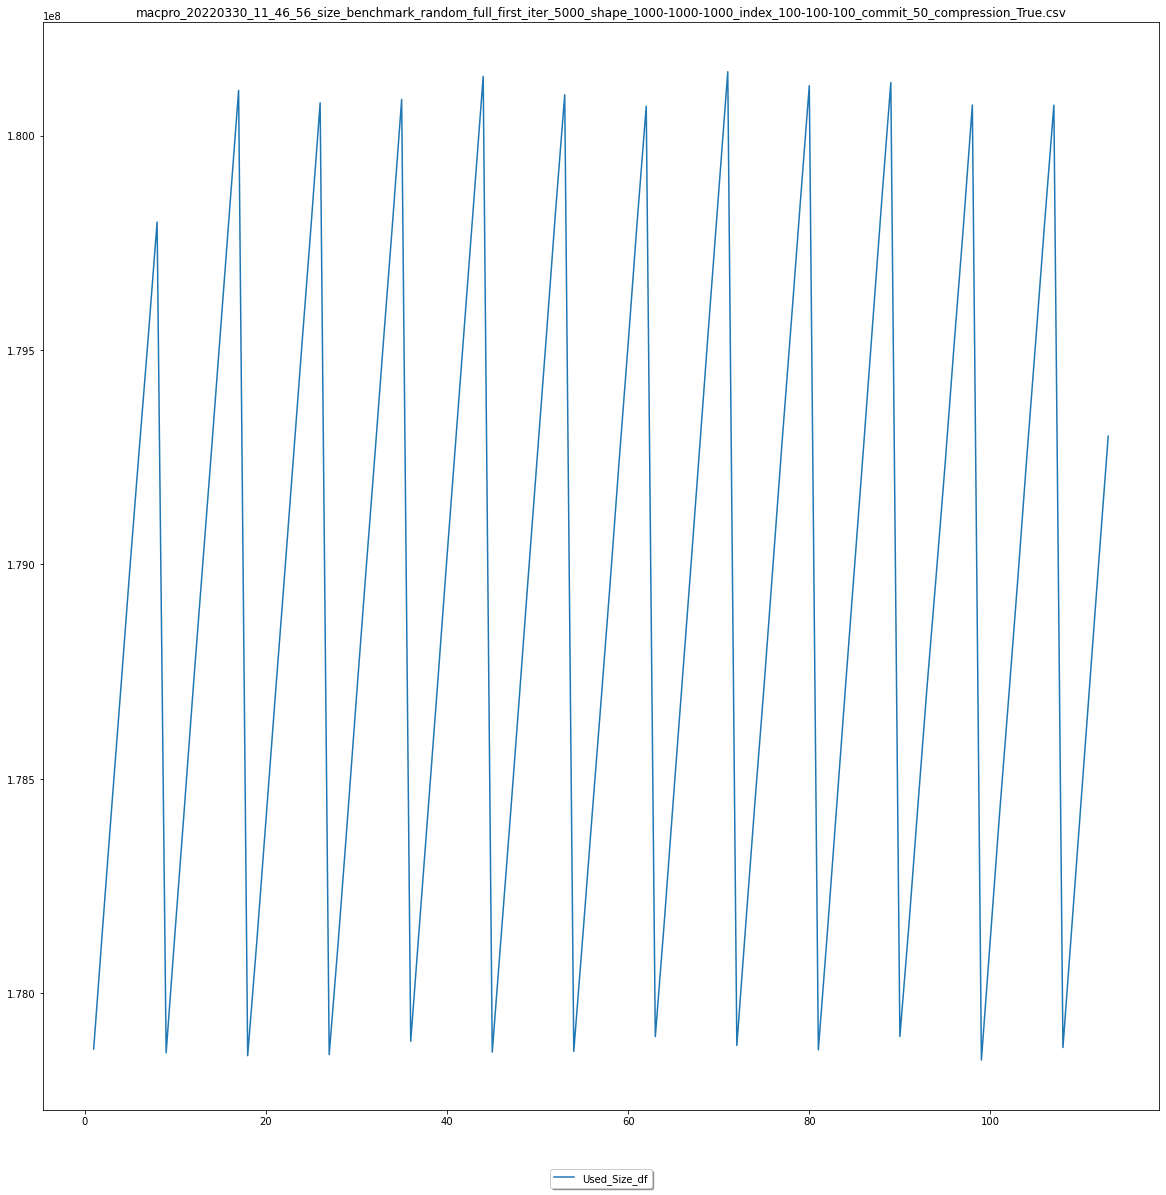

In [121]:
def plot_file(file_name,save_name= None,items = None,title = None):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    if items == None:
        items = get_header(file_name)

    for item in items:
        if item == 'Remaining_space':
            x,row_i = get_row_normalized(file_name,item)
        else:
            x,row_i = get_row(file_name,item)
#             x = x[1:]
#             row_i = row_i[1:]
        ax.plot(x, row_i, label = item)
        print('got {}'.format(item))
    # naming the x axis
#     plt.xlabel('x - axis')
#     # naming the y axis
#     plt.ylabel('y - axis')
    # giving a title to my graph
    if save_name == None:
        save_name = '{}.png'.format(os.path.basename(file_name))
    if title == None:
        title = os.path.basename(file_name)
    plt.title(title)
    # show a legend on the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
#     plt.savefig(save_name)
    # function to show the plot
    plt.show()

plot_file(full_files_size[3],items= [ 'Used_Size_df'])

In [ ]:
plot_file(size_benchmark)

In [ ]:
get_header(size_benchmark)

In [ ]:
plot_all(title="Remaining space inverted",files=files_to_process,column='Remaining_space',filter_files='size_benchmark',output_file='all_remainng_space.png',legend_map=st_map)


In [ ]:
# Remaing space 2
filtred_files = []
for f in files_to_process:
    if 'size_benchmark' in f:
        if '100p3' in f:
            if 'True' in f:
                filtred_files.append(f)
        else:
            filtred_files.append(f)

plot_all(title="Remaining space inverted",files=filtred_files,column='Remaining_space',filter_files='.csv',output_file='all_remainng_space_filtred_flat.png',legend_map=st_map)


In [ ]:

plot_all(title="Logic_Size",files=files_to_process,column='Logic_Size',filter_files='size_benchmark',output_file='Logic_Size.png',legend_map=st_map)


In [ ]:
plot_all(title="DU_Size",files=files_to_process,column='DU_Size',filter_files='size_benchmark',output_file='DU_Size.png',legend_map=st_map)

In [ ]:

plot_all(title="Used_Size_df",files=files_to_process,column='Used_Size_df',filter_files='size_benchmark',output_file='Used_Size_df.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="GC_time",files=files_to_process,columns=['GC_time'],filter_files='time_benchmark',output_file='GC_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Writing_index_time",files=files_to_process,columns=['Writing_index_time'],filter_files='time_benchmark',output_file='Writing_index_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Get_new_index_time",files=files_to_process,columns=['Get_new_index_time'],filter_files='time_benchmark',output_file='Get_new_index_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Checkout_time",files=files_to_process,columns=['Checkout_time'],filter_files='time_benchmark',output_file='Checkout_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Commit_time",files=files_to_process,columns=['Commit_time'],filter_files='time_benchmark',output_file='Commit_time.png',legend_map=st_map)


In [ ]:
f1 = 'benchmarks/v2/benchmaks_mac_16gb/macpro_20220322_12_58_13_time_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv'
for f in files_to_process:
    if '_time_benchmark' in f:
        plot_file(f,title=st_map[f])


# Size plot 

In [130]:
!df .
# 355Gi
# 743865632

Filesystem   512-blocks      Used Available Capacity iused     ifree %iused  Mounted on
/dev/disk1s1  976490568 743865632 160187336    83% 4266899 800936680    1%   /System/Volumes/Data


In [136]:
!df -h .

Filesystem     Size   Used  Avail Capacity iused     ifree %iused  Mounted on
/dev/disk1s1  466Gi  355Gi   75Gi    83% 4267058 790453720    1%   /System/Volumes/Data


In [139]:
743865632/1024/2048

354.70277404785156

In [196]:
legends = get_descriptions(full_files_size)
list(legends.values())

['macM1max_index_100-100-100_commit_100_compression_True',
 'macM1max_index_100-100-100_commit_100_compression_True',
 'macM1max_index_10-10-10_commit_100_compression_True',
 'macpro_index_100-100-100_commit_50_compression_True',
 'macpro_index_100-100-100_commit_50_compression_True',
 'macpro_index_10-10-10_commit_50_compression_True',
 'macpro_index_100-100-100_commit_50_compression_False',
 'macpro_index_10-10-10_commit_50_compression_False',
 'macpro_index_100-100-100_commit_50_compression_True',
 'macpro_index_10-10-10_commit_50_compression_True']

In [144]:
print(size_benchmark)
get_header(size_benchmark)

../../benchmarks/v3/mac_pro/macpro_20220329_17_12_21_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_True.csv


['Remaining_space', 'DU_Size', 'Used_Size_df']

In [204]:
def get_size_row_indexed(indeces,file_name,row_name):
    
    i = 0
    initial = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    for row in csvreader:
        itm = row[0].split(";")[idx]
        if itm == '':
            if i ==0 :
                return None
        else:
            val = float(itm)
            if val > 0:
                size = float(itm) 
                if i == 0:
                    initial = size
                size = size/2048
                if i >0:
                    if indeces[i]>indeces[i-1]:
                        x.append(indeces[i])
                        y.append(size)
        i = i + 1
    file.close()
    return np.array(x),np.array(y)



print(get_size_row_indexed(pos,full_files_size[3],'Used_Size_df'))

item index Used_Size_df = 2
(array([  49,   99,  149,  199,  249,  299,  349,  399,  449,  499,  549,
        599,  649,  699,  749,  799,  849,  899,  949,  999, 1049, 1099,
       1149, 1199, 1249, 1299, 1349, 1399, 1449, 1499, 1549, 1599, 1649,
       1699, 1749, 1799, 1849, 1899, 1949, 1999, 2049, 2099, 2149, 2199,
       2249, 2299, 2349, 2399, 2449, 2499, 2549, 2599, 2649, 2699, 2749,
       2799, 2849, 2899, 2949, 2999, 3049, 3099, 3149, 3199, 3249, 3299,
       3349, 3399, 3449, 3499, 3549, 3599, 3649, 3699, 3749, 3799, 3849,
       3899, 3949, 3999, 4049, 4099, 4149, 4199, 4249, 4299, 4349, 4399,
       4449, 4499, 4549, 4599, 4649, 4699, 4749, 4799, 4849, 4899, 4949,
       4999]), array([86687.69921875, 86827.43359375, 86964.3515625 , 87101.28515625,
       87238.23046875, 87369.5546875 , 87506.46484375, 86547.84765625,
       86819.234375  , 86958.96484375, 87093.12890625, 87233.03515625,
       87364.37109375, 87504.09375   , 87643.8046875 , 86549.0546875 ,
       86823.17

item index Remaining_space = 0
item index Remaining_space = 0
item index Remaining_space = 0
item index Remaining_space = 0
item index Remaining_space = 0
item index Remaining_space = 0
item index Remaining_space = 0


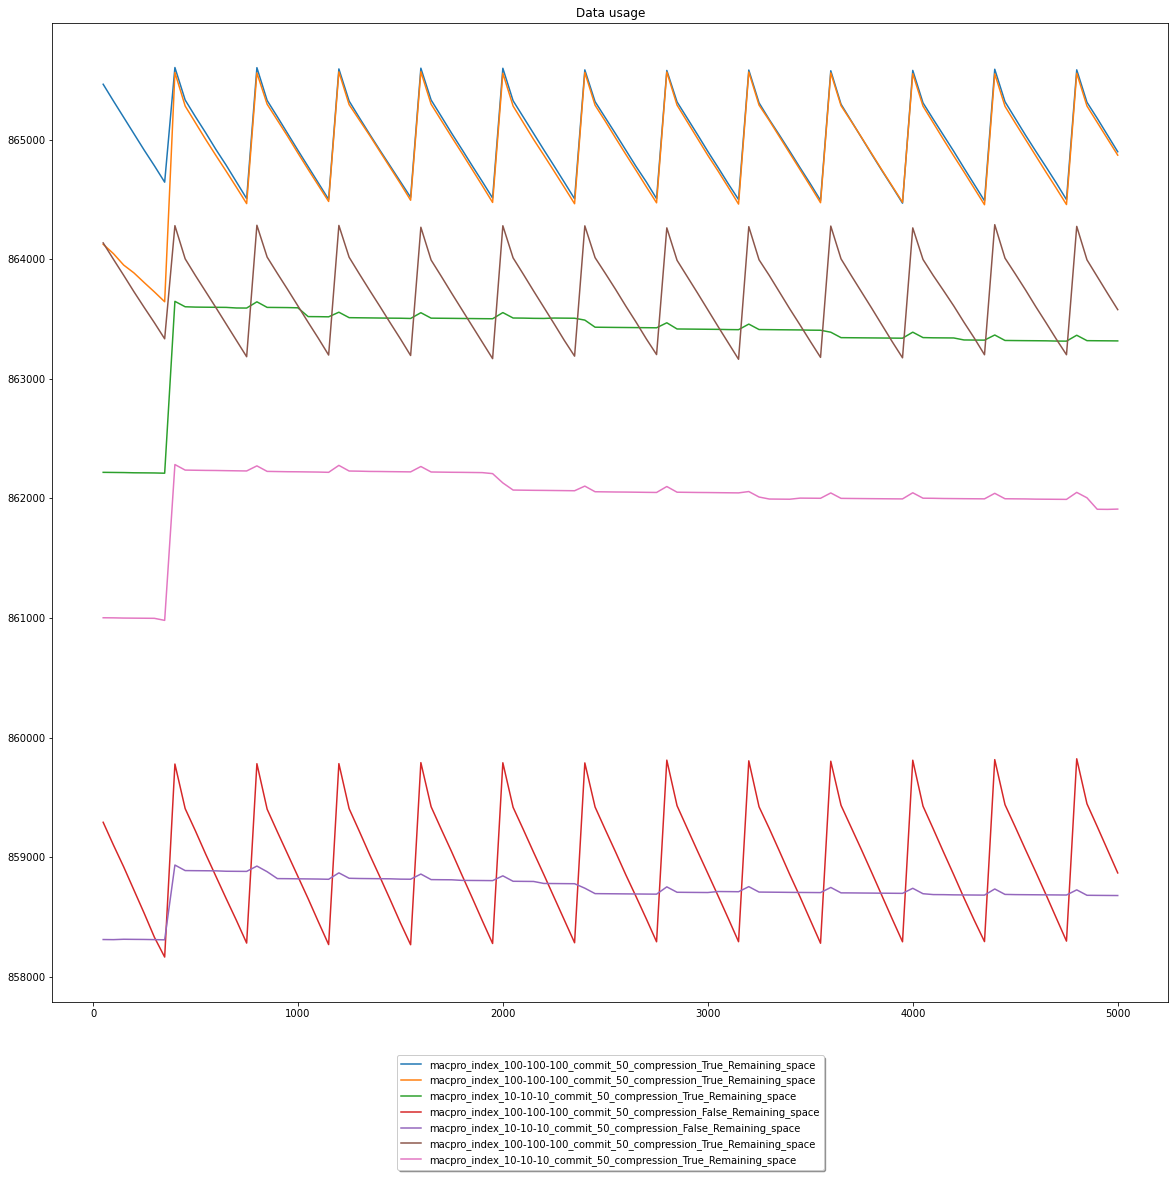

In [205]:
def plot_size_usage(pos,title,files,columns,filer_name,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    
    for f in files:
        if filer_name in f:
            for column in columns:
                x,y = get_size_row_indexed(pos,f,column)
                name="{}_{}".format(legend_map[f],column)
                ax.plot(x, y, label = name)
            


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()
    
plot_size_usage(pos=pos,title="Data usage",files=full_files_size,columns=['Remaining_space'], filer_name = "macpro",output_file='Used_Size_df.png',legend_map=legends)
